# Ciência dos Dados - Projeto 1

## Vitor Liu - 2A
## Prof. Fabio Miranda

## Titulo

## Introdução

Esse projeto tem como objetivo analisar, de acordo com as PNADs disponíveis, as diferentes caracteristicas da população de Minas Gerais em relação com o acesso à internet e televisão. Assim, é possível definir o perfil de domicílio modelo para possíveis investimentos em outros estados.

Como a área de residência, a quantidade de moradores e a renda mensal (em R$) influenciam nos diferentes servicos de Internet (3g/4g ou banda larga)?

## Análise e Resultados

In [2]:
#Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Local dos arquivos
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\LiuSeeker\Desktop\2o Semestre\Ciência dos dados\CieDados\Projeto 1


In [3]:
def ledados(plan):
    dadosres = pd.DataFrame(pd.read_csv(plan))

    #Colunas escolhidas
    dadosres = dadosres.loc[:, ["UF","V0226","V02322","V4614","V4105","V0105"]]

    #Tirando linhas com valor NaN
    dadosres = dadosres.dropna(how="any")
    
#HELP    #dadosres[(dadosres.V4105 == 1), (dadosres.V4105 == 2)|(dadosres.V4105 == 2)|(dadosres.V4105 == 3)] = "Urbana"

    #Muda as categorias das colunas
    dadosres["UF"] = dadosres["UF"].astype("category")
    dadosres["V0226"] = dadosres["V0226"].astype("category")
    dadosres["V02322"] = dadosres["V02322"].astype("category")
    dadosres["V4614"] = dadosres["V4614"].astype("int32")
    dadosres["V4105"] = dadosres["V4105"].astype("category")
    #dadosres["Área"] = dadosres["V4105"].astype("category")
    dadosres["V0105"] = dadosres["V0105"].astype("int32")

    #Define os nomes dos valores quantitativos
    dadosres["UF"].cat.categories = ["Rondonia","Acre","Amazonas","Roraima", \
    "Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
    "Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
    "São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal"]
    dadosres["V0226"].cat.categories = ["Sim", "Não"]
    dadosres["V02322"].cat.categories = ["Sim", "Não"]
    #dadosres["Área"].cat.set_categories = ["Urbana", "Rural"]
    
    #Mudança de nome das colunas
    dadosres = dadosres.rename(columns = {"V0226": "TV em cores", "V02322": "Internet", "V4614": "Renda mensal (R$)", "V0105": "Total de moradores"})
    
    #Exclusão de colunas com valores inválidos/não importantes
    dadosres = dadosres[dadosres["Renda mensal (R$)"]!=999999999999]
    dadosres = dadosres[dadosres["Renda mensal (R$)"]>=0]
    dadosres = dadosres[dadosres["UF"]=="Minas Gerais"]
    
    return(dadosres)

In [4]:
dadosres15 = ledados("DOM2015.csv")
dadosres14 = ledados("DOM2014.csv")
dadosres13 = ledados("DOM2013.csv")

#dadosres14["Internet"].value_counts() == #dadosres14.groupby("Internet").size()
#
#pd.crosstab(dadosres15["Renda mensal R$"],dadosres15["Internet"])
#dadosres13["Renda mensal R$"].describe()
#dadosres15["Renda mensal R$"].plot(kind="hist", bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000])

In [5]:
std13 = dadosres13["Renda mensal (R$)"].std()
std14 = dadosres14["Renda mensal (R$)"].std()
std15 = dadosres15["Renda mensal (R$)"].std()
mean13 = dadosres13["Renda mensal (R$)"].mean()
mean14 = dadosres14["Renda mensal (R$)"].mean()
mean15 = dadosres15["Renda mensal (R$)"].mean()
intersim13 = dadosres13["Internet"].value_counts()[0]
intersim14 = dadosres14["Internet"].value_counts()[0]
intersim15 = dadosres15["Internet"].value_counts()[0]
internao13 = dadosres13["Internet"].value_counts()[1]
internao14 = dadosres14["Internet"].value_counts()[1]
internao15 = dadosres15["Internet"].value_counts()[1]
tvsim13 = dadosres13["TV em cores"].value_counts()[0]
tvsim14 = dadosres14["TV em cores"].value_counts()[0]
tvsim15 = dadosres15["TV em cores"].value_counts()[0]
tvnao13 = dadosres13["TV em cores"].value_counts()[1]
tvnao14 = dadosres14["TV em cores"].value_counts()[1]
tvnao15 = dadosres15["TV em cores"].value_counts()[1]

In [6]:
anos = ("2013", "2014", "2015")
medias = (mean13, mean14, mean15)
medianas = (std13, std14, std15)
netsim = (intersim13, intersim14, intersim15)
netnao = (internao13, internao14, internao15)
tvsim = (tvsim13, tvsim14, tvsim15)
tvnao = (tvnao13, tvnao14, tvnao15)
dadosres = pd.DataFrame({"Média renda mensal": medias,
                         "Mediana renda mensal": medianas,
                         "Tem Internet": netsim,
                         "Não tem TV em cores": tvnao,
                         "Não tem internet": netnao,
                         "Tem TV em cores": tvsim                         
                        }, index=anos)


In [7]:
print(dadosres)

      Mediana renda mensal  Média renda mensal  Não tem TV em cores  \
2013           3974.513734         2989.080398                  258   
2014           5033.161736         3188.750976                  271   
2015           4569.504946         3325.010990                  268   

      Não tem internet  Tem Internet  Tem TV em cores  
2013              5254          5393            10389  
2014              4728          6287            10744  
2015              4380          6630            10742  


Qual é a distribuição da população de MG em relação à renda mensal (em reais)?

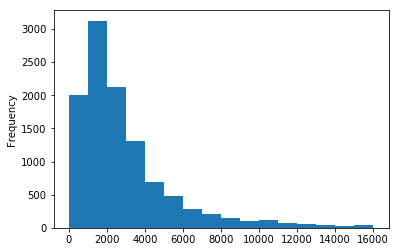

In [8]:
dadosres15["Renda mensal (R$)"].plot(kind="hist", bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000])

Qual é a distribuição de quantidade de pessoas por domicilio em MG?

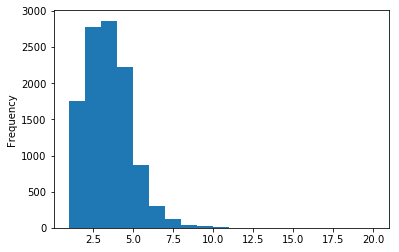

In [9]:
dadosres15["Total de moradores"].plot(kind="hist", bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

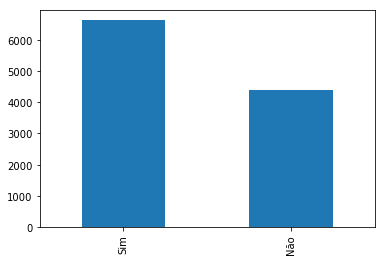

In [18]:
dadosres15["Internet"].value_counts().plot(kind="bar")

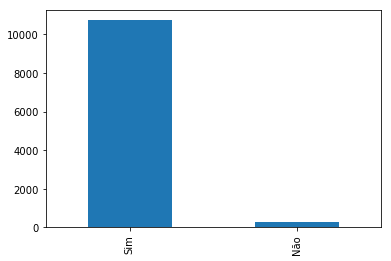

In [19]:
dadosres15["TV em cores"].value_counts().plot(kind="bar")